

Mostrando a função de transferência

FT da Planta
<TransferFunction>: sys[18]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                0.0189
--------------------------------------
10 s^3 + 5.114 s^2 + 0.825 s + 0.04137


FT da Medidor
<TransferFunction>: sys[33]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  -3.707 s + 0.5333
---------------------
13.9 s^2 + 8.95 s + 1


FT da Controlador
<TransferFunction>: sys[46]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


1008 s^2 + 134.5 s + 4.482
--------------------------
           30 s


FT da Malha Fechada
<TransferFunction>: sys[53]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                 7.947e+04 s^8 + 1.024e+05 s^7 + 5.103e+04 s^6 + 1.301e+04 s^5 + 1851 s^4 + 148 s^3 + 6.191 s^2 + 0.1051 s
--------------------------------------------------------------------------------------------------------------------------------------------
1.251e+06 s^10 + 2.085e+06 s^9 + 1.447e+06 s^8 + 5.303e+05 s^7 + 1.162e+05 s^6 + 1.676e+04 s^5 + 16

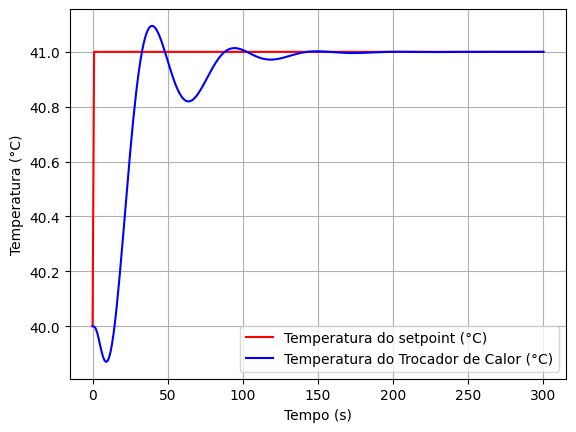

In [1]:
# ----------------------------------------------------------------------------
#                             D E S C R I Ç Ã O
# ----------------------------------------------------------------------------
# Descrição do código: Controle de temperatura de saída do trocador de calor
# Implementado por: Davi Leonardo de Souza
# Versão: 2.0
# Data: 27/03/2024
# ----------------------------------------------------------------------------
#                           B I B L I O T E C A S
# ----------------------------------------------------------------------------

import os                              # acessa funções do sistema operacional
import control as ct                   # controle
import matplotlib.pyplot as plt        # gráficos
import numpy as np                     # vetores e matrizes

# ----------------------------------------------------------------------------
#                   P R É  -  P R O C E S S A M E N T O
# ----------------------------------------------------------------------------

# Realizando a limpeza do terminal do sistema operacional
os.system('cls' if os.name == 'nt' else 'clear')

# ----------------------------------------------------------------------------
#                              F U N Ç Õ E S
# ----------------------------------------------------------------------------


# ----------------------------------------------------------------------------
#                    P R O G R A M A   P R I N C I P A L
# ----------------------------------------------------------------------------
# Variáveis de entrada:

Tts = 40                           # temperatura de entrada
Tsp = 41                           # temperatura setpoint

# Definindo a Função de Transferência:

s = ct.tf('s')                   # Define variável de Laplace

# Tempo de simulação:

t = np.arange(0, 301, 1)

# Funções de Transferência:

Gp = 0.018898/(10*s**3+5.1135*s**2+0.82503*s+0.041368)    # FT planta
Gm = (-3.7066435*s+0.53333)/(13.9*s**2+8.95*s+1)          # FT medidor
Gc = (1008.45*s**2+134.46*s+4.482)/(30*s)                 # FT controlador

# Imprimindo as Funções de Transferências

print("\n\nMostrando a função de transferência")

print("\nFT da Planta")
print(Gp)

print("\nFT da Medidor")
print(Gm)

print("\nFT da Controlador")
print(Gc)

# Resolução do problema:

# Calculando a saído do medidor:
# sinal de entrada antes da mudança no setpoint
u1 = (Tsp-Tsp) * np.ones_like(t[:1])
u2 = (Tsp-Tts) * np.ones_like(t[1:])         # entrada do setpoint
u_m = np.concatenate((u1, u2))             # sinal de entrada total

# Simulação da Função de Transferência do Medidor

tout, ym = ct.forced_response(Gm, T=t, U=u_m)         # saída do medidor

# Simulação da Função de Transferência da Malha Fechada:

FT = (Gc*Gp)/(1+Gc*Gp*Gm)

print("\nFT da Malha Fechada")
print(FT)                                             # FT da malha fechada
tout, y = ct.forced_response(FT, T=t, U=ym)           # saída da malha fechada

# Retirando variável desvio
y = y + Tts
u_m = u_m + Tts

# ----------------------------------------------------------------------------
#                             G R Á F I C O S
# ----------------------------------------------------------------------------

plt.plot(t, u_m, 'r', label='Temperatura do setpoint (°C)')
plt.plot(t, y, 'b', label='Temperatura do Trocador de Calor (°C)')
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.legend()
plt.show()
